# Aprendizaje supervisado
Autora: Beatriz Ibarra Mendoza  
Última actualización: 04/11/2023  


Este notebook analiza datos relacionados con los empleados de una empresa y variables potencialmente relacionadas con la tasa de deserción. El procesamiento de la información incluye la implementación de ingeniería de características para optimizar la base de datos y aprendizaje de máquinas supervisado. El análisis y visualización son realizados con Pandas, Numpy y Matplotlib. Lo relacionado con los modelos de aprendizaje supervisado se realizó con la paquetería Scikit-Learn. El notebook incluye las siguientes etapas:

* *Instalación* de las paqueterías.  
* *Exploración* de datos.  
* *Conclusiones preliminares* relacionadas con la exploración inicial de los datos.  
* *Ingeniería de características* previa al aprendizaje supervisado.  
* *Partición de datos*.  
* Modelos de aprendizaje: *Random Forest*.  
* Modelos de aprendizaje: *Regresión logística*.  
* Modelos de aprendizaje: *Bayes Gaussiano Ingenuo*.  
* Modelos de aprendizaje: *Máquina de vectores de soporte*.  
* *Curva ROC* para comparar modelos de aprendizaje.  
* Conclusiones.     


### Instalación

In [ ]:
# Manipulación de datos.
import pandas as pd
# Análisis de datos.
import numpy as np
# Visualización.
import matplotlib.pyplot as plt
%matplotlib inline

### Exploración de datos

In [ ]:
# Cargar data.
data = pd.read_csv('/content/Employee_Attrition_datos_reto_binario.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Información condensada y definición de tipo de variables.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- Variables categóricas: Attrition (variable de salida), BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime.  
- Variables continuas-numéricas: Age, DailyRate, DistanceFromHome, Education, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.

In [ ]:
# Determinar la cantidad de datos distintos para cada columna.
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
# Estadística de los atributos numéricos.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


- No hay valores faltantes en ninguna de las variables numéricas.  
- La edad promedio de los empleados en la empresa es de 36.9 años.  
- La distancia promedio de casa a empresa es de 9.1 Km.  
- El nivel educativo está en una escala del 1 al 5 y el promedio es de 2.9.  
- La satisfacción en el ambiente de trabajo está en una escala del 1 al 4 y el primedio es de 2.7.  
- La satisfacción en el trabajo está en una escala del 1 al 4 y el promedio es de 2.7.
- El promedio de ingreso mensual es de 6502 USD.  
- El promedio de empresas en las que han trabajado los empleados es de 2.6.  
- El promedio de incremento porcentual de salarios es de 15.2%.  
- El promedio de nivel de opciones sobre acciones es de 0.79.  
- El promedio de años en la empresa es de 7.  
- El promedio de años en el puesto actual es de 4.2.
- El promedio de años desde la última promoción es de 2.18.


In [ ]:
# Estadística de los atributos categóricos.
data.describe(include=['O']).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


- No hay valores faltantes en las variables categóricas.  
- La mayoría (882) de los empleados de la empresa son de género masculino.  
- El rol de trabajo con mayor cantidad de empleados es el 'Ejecutivo de Ventas'.  
- 673 empleados se encuentran casados.  
- Todos los empleados son mayores de 18 años.  
- El departamento con mayor cantidad de empleados (961) es R&D.

### Conclusiones preliminares relacionadas con la exploración inicial de los datos

- El objetivo de este reto es definir cuáles variables se relacionan con la tasa de deserción (Attrition) de los empleados en esta empresa.  
- No existen valores faltantes en este set de datos, sin embargo, se puede prescindir de algunas variables para hacer el análisis más práctico y eficiente. Por ejemplo:  
a) Daily rate: este es un indicador de la tarifa diaria que gana un empleado. Sin embargo, en términos de evaluar la productividad o los costos por proyecto, puede resultar más informativa la variable HourlyRate.    
b) Employee count: solo contiene el valor 1.  
c) Employee number: es un valor único para cada empleado.  
d) Job involvement: Esta variable se relaciona con Job Satisfaction, que incluye qué tan satisfechos-conectados se sienten los empleados respecto al trabajo que realizan.  
e) Over 18: todos los empleados son mayores de edad.  
f) Performance rating: solo tiene dos valores, 3 y 4.  
g) Standard hours: solo tiene 1 valor (80).  
- Las variables que podrían tener mayor correlación con la tasa de deserción son:  
  - Aquellas relacionadas con los ingresos (HourlyRate, MonthlyIncome, MonthlyRate, PercentSalaryHike).  
  - Aquellas relacionadas con beneficios/prestaciones (BusinessTravel, StockOptionLevel, TrainingTime).  
  - Aquellas relacionadas con la percepción de satisfacción respecto al empleo (EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance).  
  - Los años desde la última promoción.  
  - El departamento donde se encuentre el empleado, algunas áreas tienen mayor ofertas de empleo que otras.

### Ingeniería de características previa al aprendizaje supervisado

In [ ]:
# Crear una copia del df.
data2 = data.copy()
# Eliminar columnas.
data2 = data2.drop(columns = ['DailyRate', 'EmployeeCount',
                              'EmployeeNumber', 'JobInvolvement', 'Over18',
                              'PerformanceRating', 'StandardHours', 'OverTime'])
# Nueva información.
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [ ]:
# Convertir los valores de la variable 'Attrition' a 0 y 1.
data2['Attrition'] = data2['Attrition'].replace({'Yes': 1, 'No': 0})

In [ ]:
# Convertir las variables categóricas a numéricas con dummies.
data3 = pd.get_dummies(data2, columns = ['BusinessTravel', 'Department',
                                         'EducationField', 'Gender', 'JobRole',
                                         'MaritalStatus'], drop_first=True)
data3.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,2,94,2,4,5993,19479,...,0,0,0,0,0,0,1,0,0,1
1,49,0,8,1,3,61,2,2,5130,24907,...,0,0,0,0,0,1,0,0,1,0
2,37,1,2,2,4,92,1,3,2090,2396,...,0,1,0,0,0,0,0,0,0,1
3,33,0,3,4,4,56,1,3,2909,23159,...,0,0,0,0,0,1,0,0,1,0
4,27,0,2,1,1,40,1,2,3468,16632,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
# Normalizar datos con StandardScaler.
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

dataScaler = RobustScaler()
scaler = dataScaler.fit(data3)
dataScaled = scaler.transform(data3)

dataScaled # Arreglo.

array([[ 0.38461538,  1.        , -0.5       , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.08333333, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07692308,  1.        , -0.41666667, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.69230769,  0.        , -0.25      , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.        , -0.41666667, ...,  0.        ,
         1.        ,  0.        ],
       [-0.15384615,  0.        ,  0.08333333, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
# Nuevo dataframe con los datos normalizados.
attrition_data = pd.DataFrame(dataScaled)
attrition_data.columns = data3.columns
attrition_data.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.384615,1.0,-0.500000,-0.5,-0.5,0.783217,0.0,0.5,0.196416,0.422369,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.000000,0.0,0.083333,-1.0,0.0,-0.139860,0.0,-0.5,0.038588,0.859600,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.076923,1.0,-0.416667,-0.5,0.5,0.727273,-0.5,0.0,-0.517374,-0.953683,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.230769,0.0,-0.333333,0.5,0.5,-0.279720,-0.5,0.0,-0.367593,0.718797,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.692308,0.0,-0.416667,-1.0,-1.0,-0.727273,-0.5,-0.5,-0.265362,0.193040,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Información del nuevo dataframe.
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   float64
 2   DistanceFromHome                   1470 non-null   float64
 3   Education                          1470 non-null   float64
 4   EnvironmentSatisfaction            1470 non-null   float64
 5   HourlyRate                         1470 non-null   float64
 6   JobLevel                           1470 non-null   float64
 7   JobSatisfaction                    1470 non-null   float64
 8   MonthlyIncome                      1470 non-null   float64
 9   MonthlyRate                        1470 non-null   float64
 10  NumCompaniesWorked                 1470 non-null   float64
 11  PercentSalaryHike                  1470 non-null   float

### Partición de datos

In [ ]:
from sklearn.model_selection import train_test_split

# Primera división: 80% entrenamiento y 20% temporales.
train_temp_df, test_df = train_test_split(attrition_data, test_size=0.2, random_state=123)
# Segunda división: 60% para entrenamiento, 20% validación.
train_df, validation_df = train_test_split(train_temp_df, test_size=0.25, random_state=123)

# Separar características y tags para cada conjunto de datos.
X_train, y_train = train_df.drop(columns=['Attrition'], axis=1), train_df['Attrition']
X_validation, y_validation = validation_df.drop(columns=['Attrition'], axis=1), validation_df['Attrition']
X_test, y_test = test_df.drop(columns=['Attrition'], axis=1), test_df['Attrition']

# Datos finales.
print("Datos entrenamiento:", X_train.shape, y_train.shape)
print("Datos validación:", X_validation.shape, y_validation.shape)
print("Datos prueba:", X_test.shape, y_test.shape)

Datos entrenamiento: (882, 40) (882,)
Datos validación: (294, 40) (294,)
Datos prueba: (294, 40) (294,)


### Modelos de aprendizaje: Random Forest

In [ ]:
# Bosque aleatorio inicial con validación cruzada de 10 folds (10 árboles con profundidad max de 3).
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rfcInicial_model = RandomForestClassifier(n_estimators=10, max_depth=3)
scores = pd.DataFrame(cross_validate(rfcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("Score promedio de entrenamiento = ", scores['train_score'].mean())
print("Score promedio de validación = ", scores['test_score'].mean())
scores

Score promedio de entrenamiento =  0.8413959043392912
Score promedio de validación =  0.8356103166496427


,fit_time,score_time,test_score,train_score
0,0.024411,0.003269,0.831461,0.844893
1,0.019644,0.003017,0.831461,0.838588
2,0.024842,0.003143,0.840909,0.840050
3,0.023311,0.003093,0.840909,0.835013
4,0.019618,0.003051,0.840909,0.840050
5,0.019866,0.003176,0.840909,0.838791
6,0.023225,0.004270,0.840909,0.845088
7,0.020842,0.003383,0.829545,0.850126
8,0.021591,0.002961,0.829545,0.840050
9,0.019905,0.002957,0.829545,0.841310


In [ ]:
# Determinación de hiperparámetros a mejorar.
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 7],
              'max_features': ['sqrt', 'log2', None],
              'n_estimators': [10, 30, 60, 100]}
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid = parameters,
                        return_train_score=True)
rfc_grid.fit(X_train, y_train)

print("Mejores hiperparámetros\n",rfc_grid.best_params_) # Los mejores.

Mejores hiperparámetros
 {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}


In [ ]:
# Modelado con el conjunto de datos de prueba y mejores hiperparámetros.
rfc_model = rfc_grid.best_estimator_
rfc_model.score(X_test, y_test) # Nuevo score.

0.891156462585034

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       256
         1.0       0.88      0.18      0.30        38

    accuracy                           0.89       294
   macro avg       0.88      0.59      0.62       294
weighted avg       0.89      0.89      0.86       294



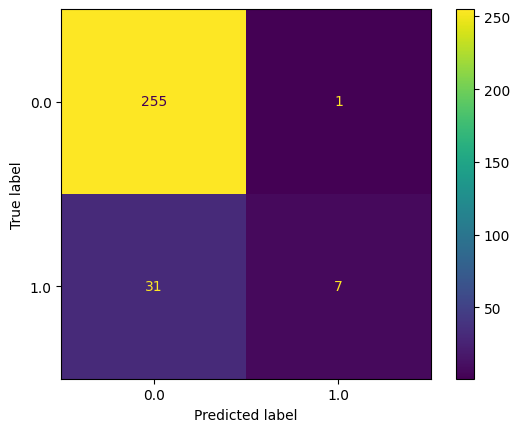

In [ ]:
# Matriz de confusión y métricas de evaluación con los datos de prueba y el bosque mejorado.
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_estimator(rfc_model, X_test, y_test)
print(classification_report(y_test, rfc_model.predict(X_test)))

### Modelos de aprendizaje: Regresión logística

In [ ]:
# Validación cruzada de 10 folds para evaluar el desempeño promedio de una Regresión Logística con C = 0.001 y solver = 'newton-cg'
from sklearn.linear_model import LogisticRegression

lrcInicial_model = LogisticRegression(C=0.001, solver='newton-cg')
scores = pd.DataFrame(cross_validate(lrcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("Score promedio de entrenamiento = ", scores['train_score'].mean())
print("Score promedio de validación = ", scores['test_score'].mean())
scores

Score promedio de entrenamiento =  0.8356010240739977
Score promedio de validación =  0.8356103166496427


,fit_time,score_time,test_score,train_score
0,0.054361,0.008849,0.831461,0.836066
1,0.050320,0.006173,0.831461,0.836066
2,0.046546,0.006163,0.840909,0.835013
3,0.036561,0.003463,0.840909,0.835013
4,0.034864,0.008466,0.840909,0.835013
5,0.035704,0.003358,0.840909,0.835013
6,0.044130,0.008734,0.840909,0.835013
7,0.044734,0.008368,0.829545,0.836272
8,0.048613,0.009338,0.829545,0.836272
9,0.054624,0.008451,0.829545,0.836272


In [ ]:
# Determinación de hiperparámetros a mejorar.
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

parameters = {'C': np.logspace(-4, 4, 50),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lrc_rand = RandomizedSearchCV(LogisticRegression(random_state=1), n_iter=48,
                              param_distributions = parameters,
                              return_train_score=True)
lrc_rand.fit(X_train, y_train)

print("Mejores hiperparámetros\n", lrc_rand.best_params_) # Mejores.

Mejores hiperparámetros
 {'solver': 'newton-cg', 'C': 1.7575106248547894}


In [ ]:
# Modelado con mejores hiperparámetros y datos de prueba.
lrc_model = lrc_rand.best_estimator_
lrc_model.score(X_test, y_test) # Nuevo score.

0.8741496598639455

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       256
         1.0       0.52      0.29      0.37        38

    accuracy                           0.87       294
   macro avg       0.71      0.63      0.65       294
weighted avg       0.85      0.87      0.86       294



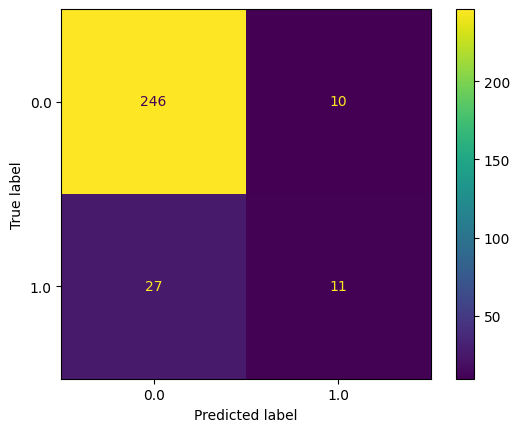

In [ ]:
# Matriz de confusión y métricas de evaluación con los datos de prueba y regresión logística mejorada.
ConfusionMatrixDisplay.from_estimator(lrc_model, X_test, y_test)
print(classification_report(y_test, lrc_model.predict(X_test)))

### Modelos de aprendizaje: Bayes Gaussiano Ingenuo

In [ ]:
# Validación cruzada de 10 folds para evaluar el desempeño promedio de Bayes Ingenuo Gaussiano
from sklearn.naive_bayes import GaussianNB

gnbc_model = GaussianNB()

scores = pd.DataFrame(cross_validate(gnbc_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("Score promedio de entrenamiento = ", scores['train_score'].mean())
print("Score promedio de validación = ", scores['test_score'].mean())
scores
# Bayes Gaussiano Ingenuo no tiene hiperparámetros especiales para ajustar.

Score promedio de entrenamiento =  0.6094784020125722
Score promedio de validación =  0.5928626149131768


,fit_time,score_time,test_score,train_score
0,0.013568,0.019425,0.640449,0.646910
1,0.013587,0.014665,0.640449,0.611602
2,0.004731,0.009680,0.579545,0.619647
3,0.026216,0.014835,0.579545,0.633501
4,0.011824,0.003259,0.602273,0.654912
5,0.006072,0.006523,0.613636,0.620907
6,0.009892,0.006482,0.647727,0.625945
7,0.007792,0.008523,0.670455,0.653652
8,0.010680,0.005403,0.386364,0.376574
9,0.010392,0.003773,0.568182,0.651134


              precision    recall  f1-score   support

         0.0       0.94      0.59      0.73       256
         1.0       0.22      0.76      0.34        38

    accuracy                           0.62       294
   macro avg       0.58      0.68      0.53       294
weighted avg       0.85      0.62      0.68       294



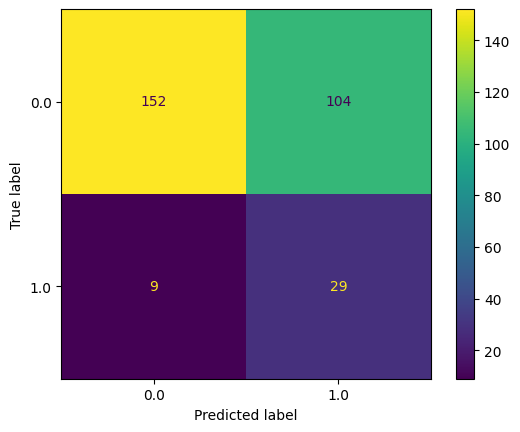

In [ ]:
# Matriz de confusión y métricas de evaluación.
gnbc_model.fit(X_train, y_train) # No se había entrenado el modelo.

ConfusionMatrixDisplay.from_estimator(gnbc_model, X_test, y_test)
print(classification_report(y_test, gnbc_model.predict(X_test)))

### Modelos de aprendizaje: Máquina de vectores de soporte

In [ ]:
# Validación cruzada de 10 folds para evaluar el desempeño promedio de una Máquina de Vectores de Soporte.
# Parámetro de regularización de 0.01 y un kernel polinomial.
from sklearn.svm import SVC

svmc_model = SVC(C=0.01, kernel="poly")

scores = pd.DataFrame(cross_validate(svmc_model, X_train, y_train, cv=10, return_train_score=True))

print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.8356010240739977
score promedio de validación =  0.8356103166496427


,fit_time,score_time,test_score,train_score
0,0.031688,0.006486,0.831461,0.836066
1,0.030084,0.006774,0.831461,0.836066
2,0.031779,0.006421,0.840909,0.835013
3,0.031721,0.006389,0.840909,0.835013
4,0.036273,0.011185,0.840909,0.835013
5,0.029744,0.006484,0.840909,0.835013
6,0.029328,0.006321,0.840909,0.835013
7,0.029971,0.006186,0.829545,0.836272
8,0.030596,0.006578,0.829545,0.836272
9,0.035907,0.006764,0.829545,0.836272


In [ ]:
# Mejora de hiperparámetros.
parameters = {'C': [0.01, 0.1, 1, 10, 50],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svmc_grid = GridSearchCV(SVC(random_state=1), param_grid = parameters,
                         return_train_score=True)
svmc_grid.fit(X_train, y_train)

print("Mejores hiperparámetros\n",svmc_grid.best_params_) # Mejores.

Mejores hiperparámetros
 {'C': 10, 'kernel': 'linear'}


In [ ]:
# Máquina de Vectores con hiperparámetros mejorados y datos de prueba.
svmc_model = svmc_grid.best_estimator_
svmc_model.score(X_test, y_test)

0.8809523809523809

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.93       256
         1.0       0.60      0.24      0.34        38

    accuracy                           0.88       294
   macro avg       0.75      0.61      0.64       294
weighted avg       0.86      0.88      0.86       294



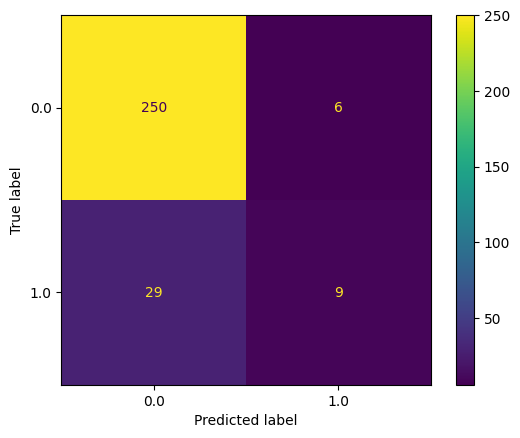

In [ ]:
# Matriz de confusión y las métricas de evaluación con datos de prueba.
ConfusionMatrixDisplay.from_estimator(svmc_model, X_test, y_test)
print(classification_report(y_test, svmc_model.predict(X_test)))

### Curva ROC para comparar modelos de aprendizaje

<Figure size 640x480 with 0 Axes>

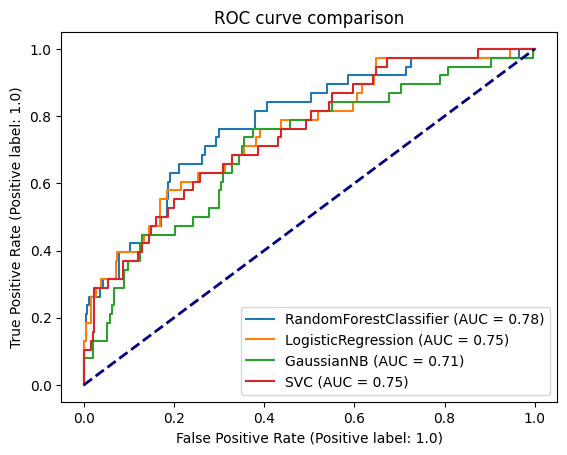

In [ ]:
# Curvas ROC para cada modelo de aprendizaje y métricas de área bajo la curva (AUC).
from sklearn.metrics import RocCurveDisplay

plt.figure()
lw = 2
disp = RocCurveDisplay.from_estimator(rfc_model, X_test, y_test)
RocCurveDisplay.from_estimator(lrc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(gnbc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svmc_model, X_test, y_test, ax=disp.ax_)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.title("ROC curve comparison")
plt.legend(loc="lower right")
plt.show()

### Conclusiones

- En el modelo de random forest, de los 294 datos de prueba, se obtuvieron 255 VP y 7 VN. El indicador AUC de este modelo es de 0.78.  
- En el modelo de regresión logística, de los 294 datos de prueba, se obtuvieron 246 VP y 11 VN. El indicador AUC de este modelo es de 0.75.  
- En el modelo de Bayes Gaussiano Ingenuo, de los 294 datos de prueba, se obtuvieron 152 VP y 29 VN. El indicador AUC de este modelo es de 0.71.  
- En el modelo de máquina de vectores de soporte, de los 294 datos de prueba, se obtuvieron 250 VP y 9 VN. El indicador AUC de este modelo es de 0.75.  

- El mejor modelo de aprendizaje con este conjunto de datos fue 'Bosque aleatorio' y el de menor rendimiento 'Bayes Gaussiano Ingenuo'.